In [13]:
import pandas as pd 
import numpy as np 
df=pd.read_csv('WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [14]:
import tensorflow as tf 
train_df=df.sample(frac=0.75,random_state=4)
val_df=df.drop(train_df.index)

In [15]:
max_val=train_df.max(axis=0)
min_val=train_df.min(axis=0)
range=max_val-min_val
train_df=(train_df-min_val)/(range)
val_df=(val_df-min_val)/range
X_train=train_df.drop('quality',axis=1)
X_val=val_df.drop('quality',axis=1)
y_train=train_df['quality']
y_val=val_df['quality']

input_shape=[X_train.shape[1]]

input_shape

[12]

model creation 

linear model 

In [17]:
model=tf.keras.Sequential([tf.keras.layers.Dense(units=1,input_shape=input_shape)])
model.summary()

C:\Users\Shuvo\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

In [18]:
model=tf.keras.Sequential([tf.keras.layers.Dense(units=64,activation='relu',input_shape=input_shape),tf.keras.layers.Dense(units=64,activation='relu'),tf.keras.layers.Dense(units=1)])
model.summary()


C:\Users\Shuvo\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,057 (19.75 KB)

 Trainable params: 5,057 (19.75 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(optimizer='adam',loss='mae')

In [20]:
losses=model.fit(X_train,y_train,validation_data=(X_val,y_val),batch_size=256,epochs=15,)

Epoch 1/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.5450 - val_loss: 0.4361
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.3777 - val_loss: 0.2662
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2187 - val_loss: 0.1466
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1390 - val_loss: 0.1499
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1629 - val_loss: 0.1595
Epoch 6/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1590 - val_loss: 0.1356
Epoch 7/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1327 - val_loss: 0.1252
Epoch 8/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1249 - val_loss: 0.1304
Epoch 9/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1279 - val_loss: 0.1278
Epoch 10/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1231 - val_loss: 0.1182
Epoch 11/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1160 - val_loss: 0.1132
Epoch 12/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1138 - val_loss: 0.1108
E

generate predictions and analyze accuracy

In [21]:
model.predict(X_val.iloc[0:3,:])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


array([[0.41210163],
       [0.41594595],
       [0.36771792]], dtype=float32)

In [22]:
y_val.iloc[0:3]

0    0.4
5    0.4
9    0.4
Name: quality, dtype: float64

analyze 

<Axes: >

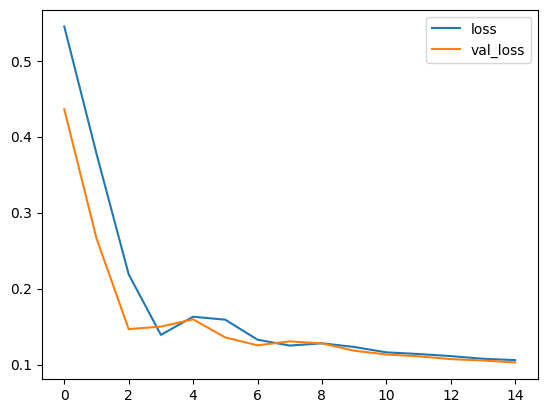

In [24]:
loss_df=pd.DataFrame(losses.history)
loss_df.loc[:,['loss','val_loss']].plot()